In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [92]:
habi_df = pd.read_excel('dataset.xlsx')

In [93]:
habi_df.head()

,id,birth_date,terms_conditions,gender,meta,date_exp_token,id.1,contact_id,type_occupation_id,type_independent_activity_id,...,company_phone,company_city_id,name,label,is_active,activity_code,name.1,label.1,viability,is_selected
0,1767,1998-05-30,1,NaN,NaN,2022-11-25 23:13:29.0,5,1767,1,1,...,NaN,NaN,"wholesale and retail, auto repair",Comercio Mayor/Menor; Reparación de Automotores,1,3,employee,Asalariado,1,0
1,1767,1998-05-30,1,NaN,NaN,2022-11-25 23:13:29.0,5,1767,1,1,...,NaN,NaN,"wholesale and retail, auto repair",Comercio Mayor/Menor; Reparación de Automotores,1,3,employee,Asalariado,0,0
2,23963,1984-07-08,0,NaN,NaN,2023-01-16 18:16:50.0,4547,23963,1,1,...,NaN,NaN,"wholesale and retail, auto repair",Comercio Mayor/Menor; Reparación de Automotores,1,3,employee,Asalariado,1,1
3,23965,1985-02-14,0,NaN,NaN,NaN,4549,23965,1,1,...,NaN,NaN,"wholesale and retail, auto repair",Comercio Mayor/Menor; Reparación de Automotores,1,3,employee,Asalariado,1,1
4,24370,1997-01-09,0,NaN,NaN,NaN,4860,24370,1,1,...,NaN,NaN,"wholesale and retail, auto repair",Comercio Mayor/Menor; Reparación de Automotores,1,3,employee,Asalariado,1,1


In [140]:
habi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3944 entries, 0 to 3943
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   birth_date                    3900 non-null   object 
 1   terms_conditions              3944 non-null   int64  
 2   date_exp_token                2351 non-null   object 
 3   contact_id                    3944 non-null   int64  
 4   type_occupation_id            3944 non-null   int64  
 5   type_independent_activity_id  3944 non-null   int64  
 6   incomes                       3944 non-null   int64  
 7   extra_incomes                 3944 non-null   int64  
 8   familiar_debts                3944 non-null   int64  
 9   is_tax_return                 3944 non-null   int64  
 10  loan_required                 3944 non-null   int64  
 11  defer_years                   3944 non-null   int64  
 12  region_id                     2641 non-null   float64
 13  nam

<Axes: >

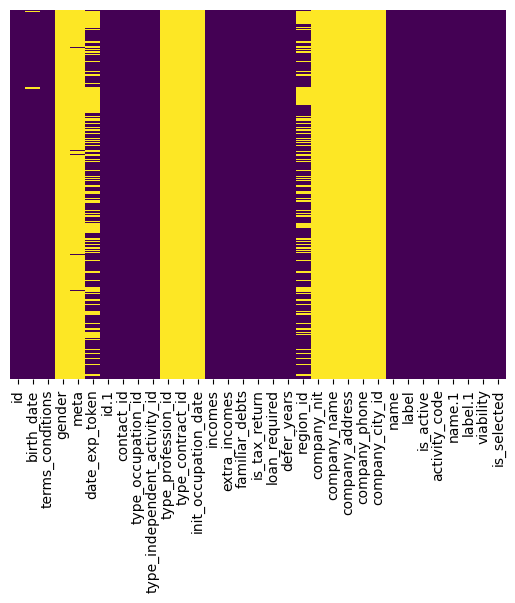

In [94]:
sns.heatmap(habi_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No son utiles: 
gender
meta
type_profession_id
type_contract_id
init_occupation_date
company_nit
company_name
company_address
company_phone
company_city_id

In [95]:
habi_df.columns

Index(['id', 'birth_date', 'terms_conditions', 'gender', 'meta',
       'date_exp_token', 'id.1', 'contact_id', 'type_occupation_id',
       'type_independent_activity_id', 'type_profession_id',
       'type_contract_id', 'init_occupation_date', 'incomes', 'extra_incomes',
       'familiar_debts', 'is_tax_return', 'loan_required', 'defer_years',
       'region_id', 'company_nit', 'company_name', 'company_address',
       'company_phone', 'company_city_id', 'name', 'label', 'is_active',
       'activity_code', 'name.1', 'label.1', 'viability', 'is_selected'],
      dtype='object')

In [96]:
ids_columns = ['id','id.1']
null_columns = ["gender",
    "meta",
    "type_profession_id",
    "type_contract_id",
    "init_occupation_date",
    "company_nit",
    "company_name",
    "company_address",
    "company_phone",
    "company_city_id"
    ]

habi_df = habi_df.drop(columns=ids_columns+null_columns)

# Verificar valores nulos 

<Axes: >

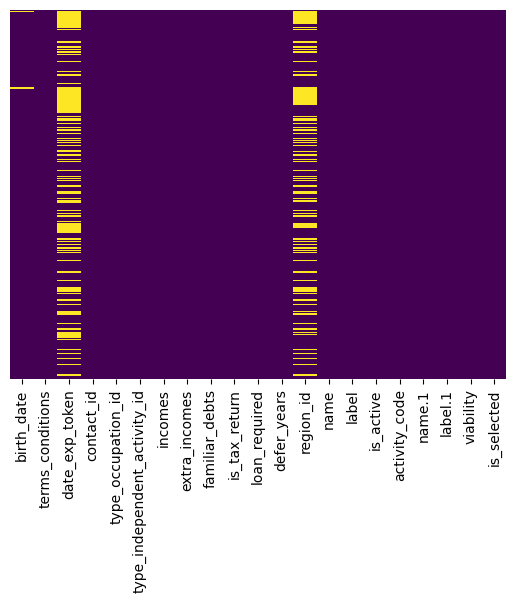

In [97]:
sns.heatmap(habi_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [98]:
habi_df.head()

,birth_date,terms_conditions,date_exp_token,contact_id,type_occupation_id,type_independent_activity_id,incomes,extra_incomes,familiar_debts,is_tax_return,...,defer_years,region_id,name,label,is_active,activity_code,name.1,label.1,viability,is_selected
0,1998-05-30,1,2022-11-25 23:13:29.0,1767,1,1,1500000,700000,0,0,...,0,26.0,"wholesale and retail, auto repair",Comercio Mayor/Menor; Reparación de Automotores,1,3,employee,Asalariado,1,0
1,1998-05-30,1,2022-11-25 23:13:29.0,1767,1,1,1500000,700000,0,0,...,0,26.0,"wholesale and retail, auto repair",Comercio Mayor/Menor; Reparación de Automotores,1,3,employee,Asalariado,0,0
2,1984-07-08,0,2023-01-16 18:16:50.0,23963,1,1,4781830,0,0,1,...,0,1.0,"wholesale and retail, auto repair",Comercio Mayor/Menor; Reparación de Automotores,1,3,employee,Asalariado,1,1
3,1985-02-14,0,NaN,23965,1,1,9000000,1000000,0,1,...,0,11.0,"wholesale and retail, auto repair",Comercio Mayor/Menor; Reparación de Automotores,1,3,employee,Asalariado,1,1
4,1997-01-09,0,NaN,24370,1,1,8000000,0,0,1,...,0,NaN,"wholesale and retail, auto repair",Comercio Mayor/Menor; Reparación de Automotores,1,3,employee,Asalariado,1,1


In [99]:
habi_df[['name','label']].groupby(['name','label']).size() 

name                                               label                                             
agriculture, livestock, hunting, forestry fishing  Agricultura, Ganadería, Caza, Silvicultura y Pesca      66
association and repair activities                  Actividades de Asociación y Reparación                  47
manufacture                                        Industrias Manufactureras                              130
other personal services activities                 Otras Actividades de Servicios Personales              537
others                                             Otros                                                 1244
professional scientif and technical activities     Actividades Profesionales, Ciéntificas y Técnicas      777
real state activitys                               Actividades Inmobiliarias                              189
transport and storage                              Transporte y Almacenamiento                            169
wholesale and reta

In [100]:
habi_df[['name.1','label.1']].groupby(['name.1','label.1']).size() 


name.1       label.1      
employee     Asalariado        118
independent  Independiente    3825
retired      Pensionado          1
dtype: int64

In [101]:
repeated_columns = ["label",  'label.1' ]
habi_df = habi_df.drop(columns=repeated_columns)

* el dataset es inbalanceado

In [102]:
habi_df['viability'].value_counts()

viability
1    2698
0    1246
Name: count, dtype: int64

In [103]:
habi_df.head()

,birth_date,terms_conditions,date_exp_token,contact_id,type_occupation_id,type_independent_activity_id,incomes,extra_incomes,familiar_debts,is_tax_return,loan_required,defer_years,region_id,name,is_active,activity_code,name.1,viability,is_selected
0,1998-05-30,1,2022-11-25 23:13:29.0,1767,1,1,1500000,700000,0,0,0,0,26.0,"wholesale and retail, auto repair",1,3,employee,1,0
1,1998-05-30,1,2022-11-25 23:13:29.0,1767,1,1,1500000,700000,0,0,0,0,26.0,"wholesale and retail, auto repair",1,3,employee,0,0
2,1984-07-08,0,2023-01-16 18:16:50.0,23963,1,1,4781830,0,0,1,0,0,1.0,"wholesale and retail, auto repair",1,3,employee,1,1
3,1985-02-14,0,NaN,23965,1,1,9000000,1000000,0,1,0,0,11.0,"wholesale and retail, auto repair",1,3,employee,1,1
4,1997-01-09,0,NaN,24370,1,1,8000000,0,0,1,0,0,NaN,"wholesale and retail, auto repair",1,3,employee,1,1


In [105]:
habi_df.columns

Index(['birth_date', 'terms_conditions', 'date_exp_token', 'contact_id',
       'type_occupation_id', 'type_independent_activity_id', 'incomes',
       'extra_incomes', 'familiar_debts', 'is_tax_return', 'loan_required',
       'defer_years', 'region_id', 'name', 'is_active', 'activity_code',
       'name.1', 'viability', 'is_selected'],
      dtype='object')

In [145]:
habi_df = habi_df.sample(frac=1)

# amount of fraud classes 492 rows.
viability_df = habi_df.loc[habi_df['viability'] == 1][:1246]
non_viability_df = habi_df.loc[habi_df['viability'] == 0]

normal_distributed_df = pd.concat([viability_df, non_viability_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,birth_date,terms_conditions,date_exp_token,contact_id,type_occupation_id,type_independent_activity_id,incomes,extra_incomes,familiar_debts,is_tax_return,loan_required,defer_years,region_id,name,is_active,activity_code,name.1,viability,is_selected
3316,1991-09-03,1,2023-01-23 14:00:23.0,24363,3,12,2000000,0,1000000,0,0,0,1.0,real state activitys,1,4,independent,0,0
1810,1996-06-21,0,2023-04-30 19:10:20.0,19880,3,2,25389565,0,350000,1,0,0,1.0,others,1,4,independent,0,0
1381,1993-11-16,1,2023-01-18 16:03:49.0,24144,3,2,6000000,0,300000,1,0,0,5.0,others,1,4,independent,0,1
880,1988-07-24,1,NaN,14246,3,2,12831000,0,0,1,0,0,NaN,others,1,4,independent,0,1
3699,1984-02-14,1,2023-02-10 14:54:38.0,26448,3,13,6400000,0,0,1,0,0,26.0,other personal services activities,1,4,independent,1,1


Distribution of the Classes in the subsample dataset
viability
0    0.5
1    0.5
Name: count, dtype: float64


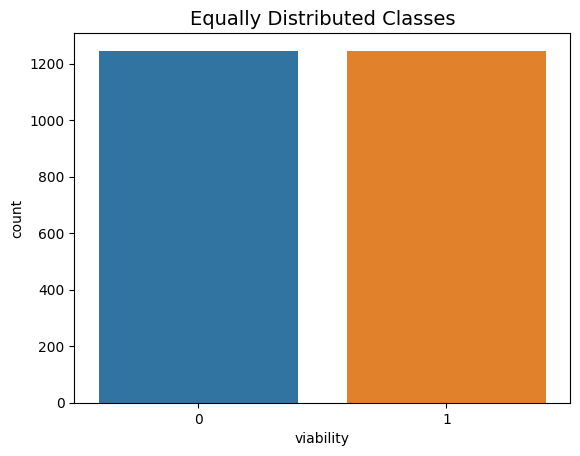

In [146]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['viability'].value_counts()/len(new_df))



sns.countplot(x='viability', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [104]:

def proba_plot(df:pd.DataFrame,feature:str):
    probabilities = df.groupby([feature, 'viability']).size() / df.groupby(feature).size()
    probabilities = probabilities.reset_index().rename(columns={0: 'Probability'})
    pivot_df = probabilities.pivot(index=feature, columns='viability', values='Probability')
    pivot_df.plot(kind='bar', stacked=False)
    plt.title('Probabilities of Class Combinations')
    plt.xlabel(feature)
    plt.ylabel('Probability')
    plt.show()

terms_conditions


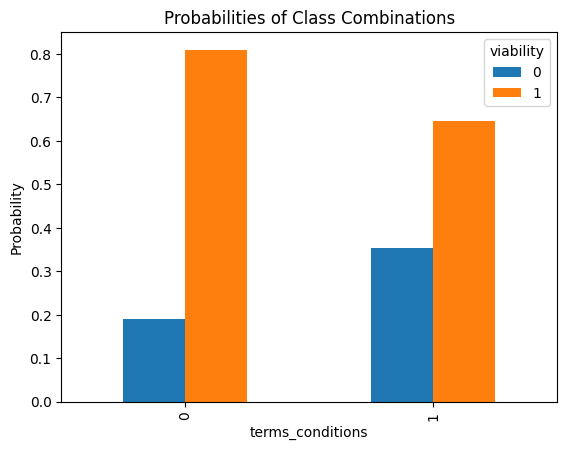

type_occupation_id


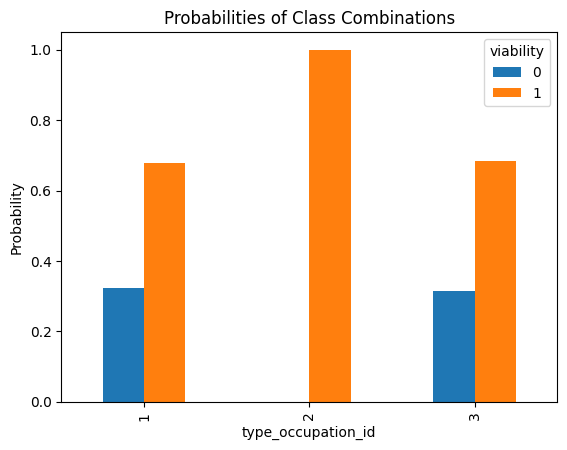

type_independent_activity_id


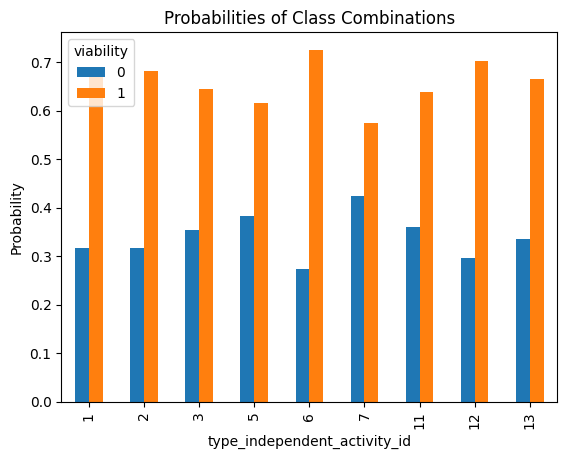

familiar_debts


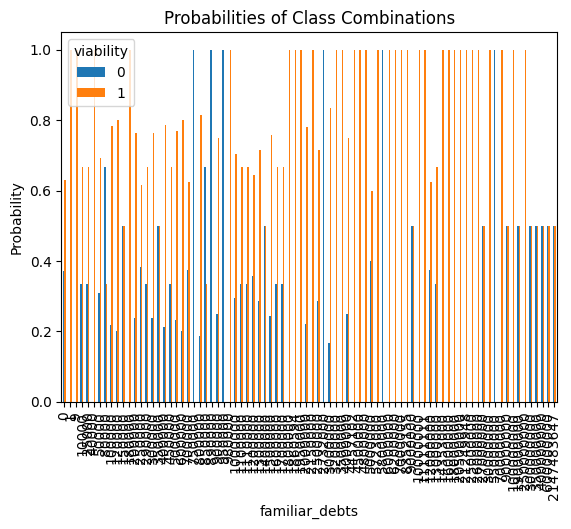

is_tax_return


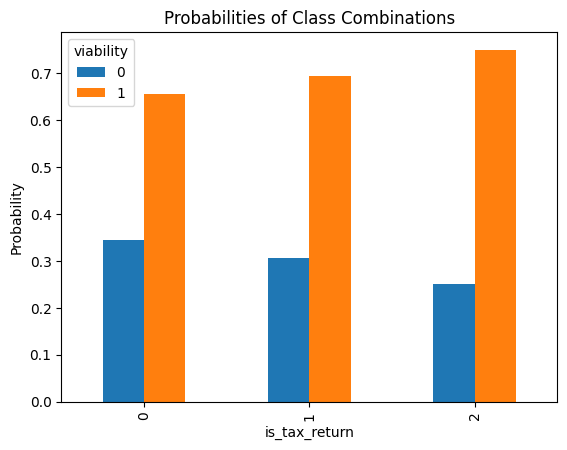

loan_required


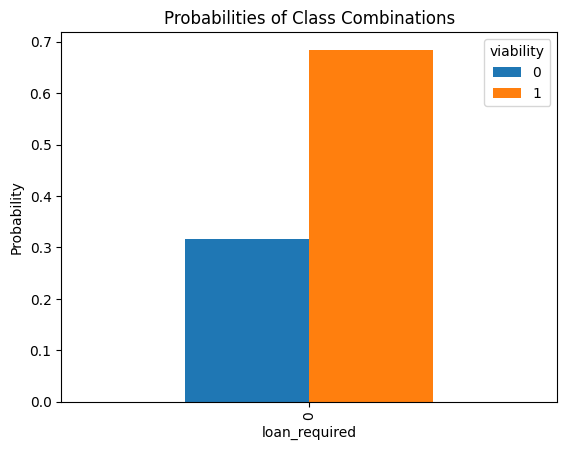

defer_years


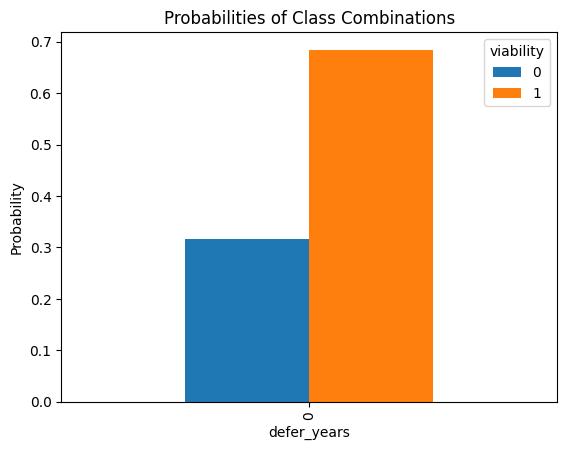

is_active


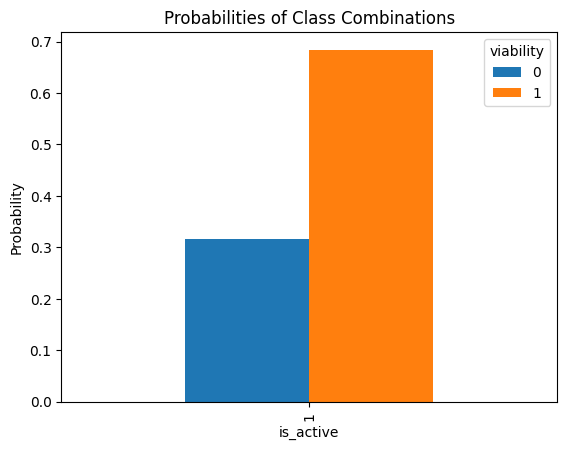

activity_code


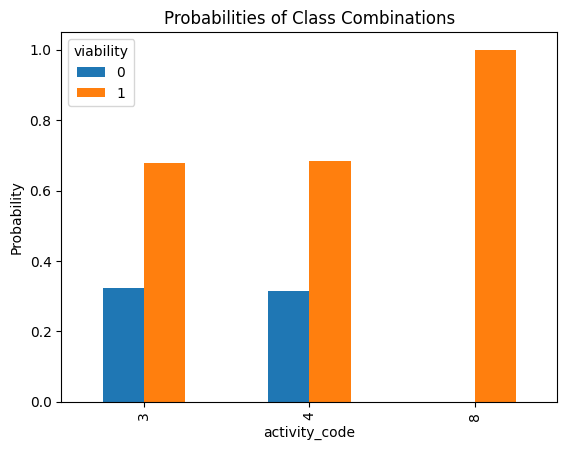

is_selected


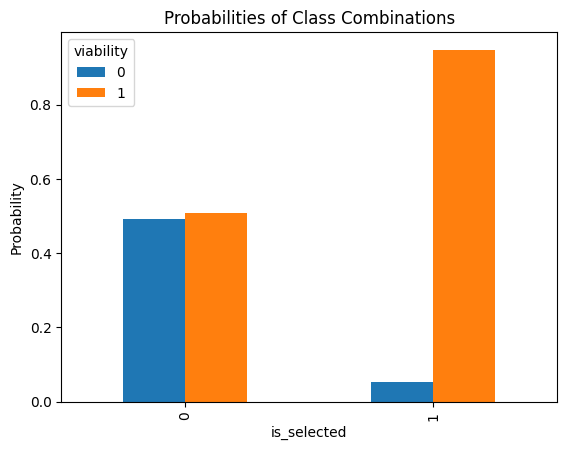

In [147]:
categorical = ['terms_conditions','type_occupation_id','type_independent_activity_id','familiar_debts', 'is_tax_return', 'loan_required',  'defer_years','is_active','activity_code','is_selected']

for c in categorical:
    print(c)
    proba_plot(new_df,c)

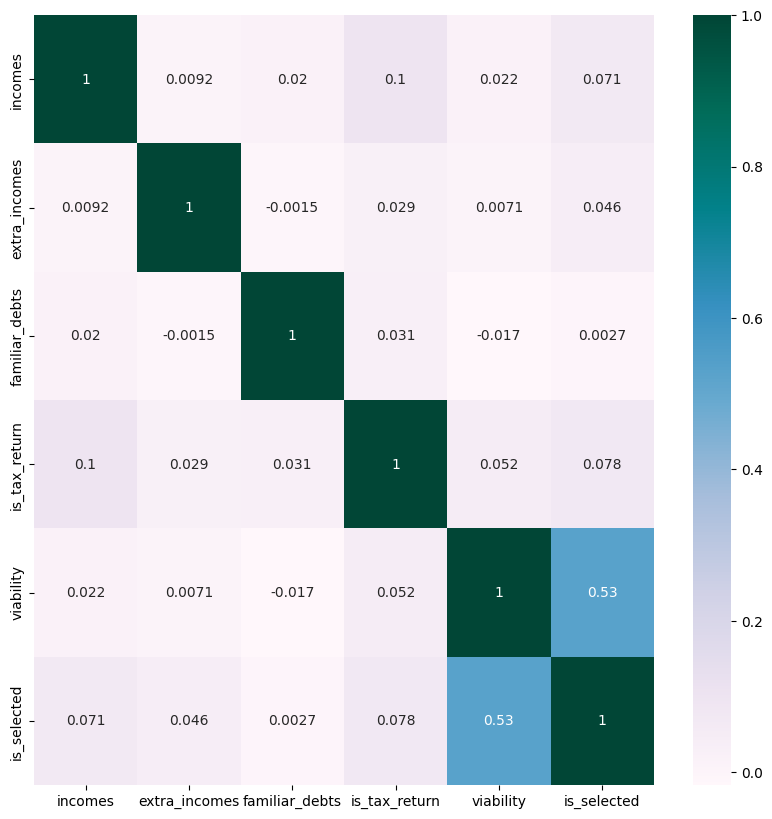

In [148]:
plt.figure(figsize=(10,10))
plt.rc('font', size=10)
hm=sns.heatmap((new_df[['incomes','extra_incomes','familiar_debts','is_tax_return','viability','is_selected']].corr()),cmap="PuBuGn",annot=True)

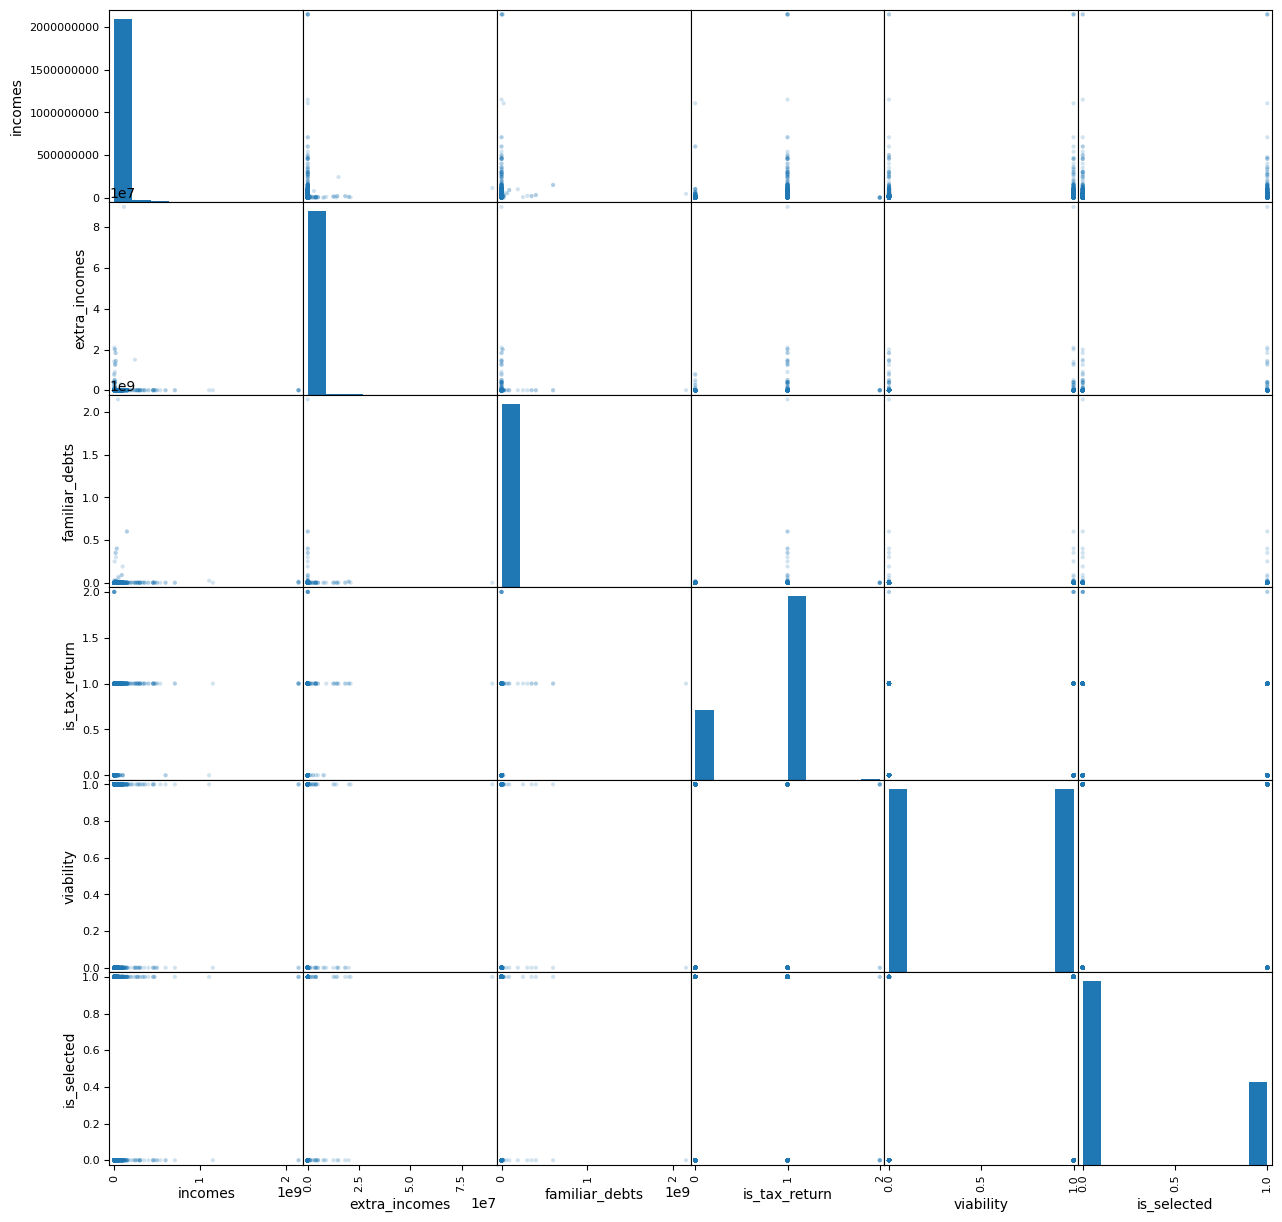

In [149]:
pd.plotting.scatter_matrix(new_df[['incomes','extra_incomes','familiar_debts','is_tax_return','viability','is_selected']], alpha=0.2,figsize=(15,15))
print()

In [150]:
from sklearn.metrics import mutual_info_score

def mutual_info_churn_score(series):
    return mutual_info_score(series,new_df['viability'])


mi = new_df[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

is_selected                     0.154818
familiar_debts                  0.027355
terms_conditions                0.014131
type_independent_activity_id    0.002581
is_tax_return                   0.001457
type_occupation_id              0.000025
activity_code                   0.000025
loan_required                   0.000000
defer_years                     0.000000
is_active                       0.000000
dtype: float64

In [156]:
new_df.head()

,birth_date,terms_conditions,date_exp_token,contact_id,type_occupation_id,type_independent_activity_id,incomes,extra_incomes,familiar_debts,is_tax_return,loan_required,defer_years,region_id,name,is_active,activity_code,name.1,viability,is_selected
3316,1991-09-03,1,2023-01-23 14:00:23.0,24363,3,12,2000000,0,1000000,0,0,0,1.0,real state activitys,1,4,independent,0,0
1810,1996-06-21,0,2023-04-30 19:10:20.0,19880,3,2,25389565,0,350000,1,0,0,1.0,others,1,4,independent,0,0
1381,1993-11-16,1,2023-01-18 16:03:49.0,24144,3,2,6000000,0,300000,1,0,0,5.0,others,1,4,independent,0,1
880,1988-07-24,1,NaN,14246,3,2,12831000,0,0,1,0,0,NaN,others,1,4,independent,0,1
3699,1984-02-14,1,2023-02-10 14:54:38.0,26448,3,13,6400000,0,0,1,0,0,26.0,other personal services activities,1,4,independent,1,1


In [157]:
new_df['type_independent_activity_id'].value_counts()

type_independent_activity_id
2     814
1     486
6     467
13    339
12    112
3     105
11     95
7      47
5      27
Name: count, dtype: int64

# Train

In [158]:
from sklearn.model_selection import train_test_split

partial = new_df[['terms_conditions','type_occupation_id','incomes','type_independent_activity_id','extra_incomes','familiar_debts','is_tax_return','viability','is_selected']]
# Extract feature and target arrays
X, y = partial.drop('viability', axis=1), partial['viability']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)



In [171]:
import optuna
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function for Optuna
def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'booster': 'gbtree',
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 0.9, 0.1),
        'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.6, 0.9, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'random_state': 42
    }
    
    # Create the XGBoost classifier
    xgb_cl = xgb.XGBClassifier(**params)
    
    # Fit the classifier
    xgb_cl.fit(X_train, y_train)
    
    # Make predictions
    preds = xgb_cl.predict(X_test)
    
    # Calculate roc_auc_score
    score = roc_auc_score(y_test, preds)
    
    return score

# Create an Optuna study object
study = optuna.create_study(direction='maximize')

# Optimize the objective function
study.optimize(objective, n_trials=10)

# Get the best parameters and best score
best_params = study.best_params
best_score = study.best_value

print("Best Parameters:", best_params)
print("Best ROC AUC Score:", best_score)

[I 2023-06-02 20:39:56,592] A new study created in memory with name: no-name-507997ad-5885-4c00-b21f-fd6522f38815
[I 2023-06-02 20:39:56,655] Trial 0 finished with value: 0.7495891602758264 and parameters: {'max_depth': 3, 'learning_rate': 0.014705380000941841, 'subsample': 0.8, 'colsample_bytree': 0.8, 'n_estimators': 107}. Best is trial 0 with value: 0.7495891602758264.
[I 2023-06-02 20:39:56,909] Trial 1 finished with value: 0.6682106721660115 and parameters: {'max_depth': 7, 'learning_rate': 0.043254993032342266, 'subsample': 0.6, 'colsample_bytree': 0.9, 'n_estimators': 276}. Best is trial 0 with value: 0.7495891602758264.
[I 2023-06-02 20:39:57,842] Trial 2 finished with value: 0.6277389314944899 and parameters: {'max_depth': 9, 'learning_rate': 0.016891883749669923, 'subsample': 0.6, 'colsample_bytree': 0.9, 'n_estimators': 946}. Best is trial 0 with value: 0.7495891602758264.
[I 2023-06-02 20:39:57,941] Trial 3 finished with value: 0.7368772958690468 and parameters: {'max_depth

Best Parameters: {'max_depth': 3, 'learning_rate': 0.014705380000941841, 'subsample': 0.8, 'colsample_bytree': 0.8, 'n_estimators': 107}
Best ROC AUC Score: 0.7495891602758264


[Text(0.5, 58.7222222222222, 'Predicted'),
 Text(70.72222222222221, 0.5, 'Actual')]

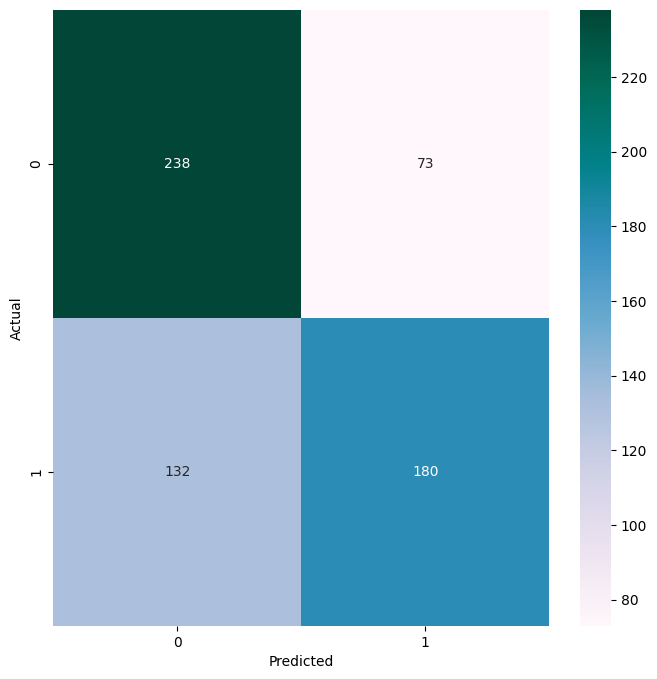

In [161]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, preds,labels=[0,1])
cm_df = pd.DataFrame(cm ,columns=['0','1'],index=['0','1'])
plt.figure(figsize=(8, 8))
plot =sns.heatmap(cm_df,cmap="PuBuGn",annot=True,fmt='g')
plot.set(xlabel='Predicted', ylabel='Actual')

In [162]:
print(classification_report(y_test, preds, labels=[0,1]))


              precision    recall  f1-score   support

           0       0.64      0.77      0.70       311
           1       0.71      0.58      0.64       312

    accuracy                           0.67       623
   macro avg       0.68      0.67      0.67       623
weighted avg       0.68      0.67      0.67       623



In [163]:
from sklearn.metrics import roc_auc_score

score = roc_auc_score(y_test, preds)
round(score,3)

0.671